# <span style="color: teal;">🌍 Data Sources</span>

## <span style="color: coral;">📦 Pickle Format</span>
Here are the available data sources in pickle format:

1. <span style="color: darkslateblue;">**India Dataset 1**</span>: <span style="color: gray;">`sources/India1_gdf.pickle`</span>
2. <span style="color: darkslateblue;">**India Dataset 0**</span>: <span style="color: gray;">`sources/India0_gdf.pickle`</span>
3. <span style="color: darkslateblue;">**Asia Dataset 1**</span>: <span style="color: gray;">`sources/asia1_gdf.pickle`</span>
4. <span style="color: darkslateblue;">**Asia Dataset 0**</span>: <span style="color: gray;">`sources/asia0_gdf.pickle`</span>
5. <span style="color: darkslateblue;">**Americas Dataset 1**</span>: <span style="color: gray;">`sources/americas1_gdf.pickle`</span>
6. <span style="color: darkslateblue;">**Americas Dataset 0**</span>: <span style="color: gray;">`sources/americas0_gdf.pickle`</span>


## <span style="color: mediumseagreen;">📥 1. Download Country Dataset with Regional Codes</span>


In [5]:
import requests
import os
def download_csv(url: str, save_path: str) -> None:
    """
    Downloads a CSV file from a given URL and saves it to a specified path.
    Parameters:
    url (str): The URL of the CSV file to download.
    save_path (str): The path where the CSV file should be saved.
    Raises:
    Exception: Raises an exception if the download fails or the URL is invalid.
    """
    try:
        # Send a GET request to the URL
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses (4xx and 5xx)
        # Create the directory if it doesn't exist
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        # Save the content to the specified path
        with open(save_path, 'wb') as file:
            file.write(response.content)
        print(f"File downloaded successfully and saved to: {save_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading the file: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
# URL of the CSV file
url = "https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
# Path to save the CSV file
save_path = "data/countries.csv"
# Download the CSV file
download_csv(url, save_path)

File downloaded successfully and saved to: data/countries.csv


In [6]:
import pandas as pd
# Load the CSV file into a DataFrame
countries_df = pd.read_csv('data/countries.csv')
# Rename specific columns for clarity
# 'alpha-3' is renamed to 'iso3' and 'alpha-2' to 'iso2'
countries_df.rename(columns={'alpha-3': 'iso3', 'alpha-2': 'iso2'}, inplace=True)
# Drop unnecessary columns that are not needed for analysis
# The following columns are removed:
# 'iso_3166-2', 'country-code', 'region-code', 'sub-region-code', 'intermediate-region-code'
countries_df.drop(columns=['iso_3166-2', 'country-code', 'region-code', 
                           'sub-region-code', 'intermediate-region-code'], inplace=True)
# Display the resulting DataFrame
countries_df

,name,iso2,iso3,region,sub-region,intermediate-region
0,Afghanistan,AF,AFG,Asia,Southern Asia,NaN
1,Åland Islands,AX,ALA,Europe,Northern Europe,NaN
2,Albania,AL,ALB,Europe,Southern Europe,NaN
3,Algeria,DZ,DZA,Africa,Northern Africa,NaN
4,American Samoa,AS,ASM,Oceania,Polynesia,NaN
...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,Oceania,Polynesia,NaN
245,Western Sahara,EH,ESH,Africa,Northern Africa,NaN
246,Yemen,YE,YEM,Asia,Western Asia,NaN
247,Zambia,ZM,ZMB,Africa,Sub-Saharan Africa,Eastern Africa


## <span style="color: mediumvioletred;">🌐 2. Download India's Shapefiles from GADM</span>
[Download GADM Shapefiles](https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_IND_shp.zip)

In [7]:
import os
import requests
import zipfile
# Define the URL for the GADM shapefile and the target directory
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_IND_shp.zip"
target_dir = "data/gadm41/india"
zip_file_path = os.path.join(target_dir, "gadm41_IND_shp.zip")
# Create the target directory if it does not exist
os.makedirs(target_dir, exist_ok=True)
# Check if the ZIP file already exists; if not, download it
if not os.path.isfile(zip_file_path):
    print("Downloading GADM shapefiles...")
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        # Save the downloaded content to a zip file
        with open(zip_file_path, 'wb') as f:
            f.write(response.content)
        print(f"Download completed: {zip_file_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error during download: {e}")
else:
    print(f"GADM shapefile already exists: {zip_file_path}. Skipping download.")
# Unzip the file if it exists
if os.path.isfile(zip_file_path):
    print(f"Unzipping the file: {zip_file_path}...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(target_dir)
        # List the files being extracted
        extracted_files = zip_ref.namelist()
    print(f"Unzip completed. Extracted files: {', '.join(extracted_files)}")
# List the contents of the target directory
print("Contents of the directory:")
print(os.listdir(target_dir))

GADM shapefile already exists: data/gadm41/india/gadm41_IND_shp.zip. Skipping download.
Unzipping the file: data/gadm41/india/gadm41_IND_shp.zip...
Unzip completed. Extracted files: gadm41_IND_0.cpg, gadm41_IND_0.dbf, gadm41_IND_0.prj, gadm41_IND_0.shp, gadm41_IND_0.shx, gadm41_IND_1.cpg, gadm41_IND_1.dbf, gadm41_IND_1.prj, gadm41_IND_1.shp, gadm41_IND_1.shx, gadm41_IND_2.cpg, gadm41_IND_2.dbf, gadm41_IND_2.prj, gadm41_IND_2.shp, gadm41_IND_2.shx, gadm41_IND_3.cpg, gadm41_IND_3.dbf, gadm41_IND_3.prj, gadm41_IND_3.shp, gadm41_IND_3.shx
Contents of the directory:
['gadm41_IND_2.shp', 'gadm41_IND_2.prj', 'gadm41_IND_2.dbf', 'gadm41_IND_0.dbf', 'gadm41_IND_0.prj', 'gadm41_IND_1.shx', 'gadm41_IND_1.cpg', 'gadm41_IND_3.shx', 'gadm41_IND_shp.zip', 'gadm41_IND_3.shp', 'gadm41_IND_2.shx', 'gadm41_IND_3.prj', 'gadm41_IND_3.dbf', 'gadm41_IND_3.cpg', 'gadm41_IND_2.cpg', 'gadm41_IND_0.shp', 'gadm41_IND_0.cpg', 'gadm41_IND_1.shp', 'gadm41_IND_1.prj', 'gadm41_IND_1.dbf', 'gadm41_IND_0.shx']


### <span style="color: purple;">2.1 Import Shape Files for Levels 0 and 1</span>


Level 0 GeoDataFrame:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GID_0     6 non-null      object  
 1   COUNTRY   6 non-null      object  
 2   geometry  6 non-null      geometry
dtypes: geometry(1), object(2)
memory usage: 276.0+ bytes
None

Level 1 GeoDataFrame:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_1      41 non-null     object  
 1   GID_0      41 non-null     object  
 2   COUNTRY    41 non-null     object  
 3   NAME_1     41 non-null     object  
 4   VARNAME_1  41 non-null     object  
 5   NL_NAME_1  41 non-null     object  
 6   TYPE_1     41 non-null     object  
 7   ENGTYPE_1  41 non-null     object  
 8   CC_1       41 non-null     object  
 9   HASC_1     41 no

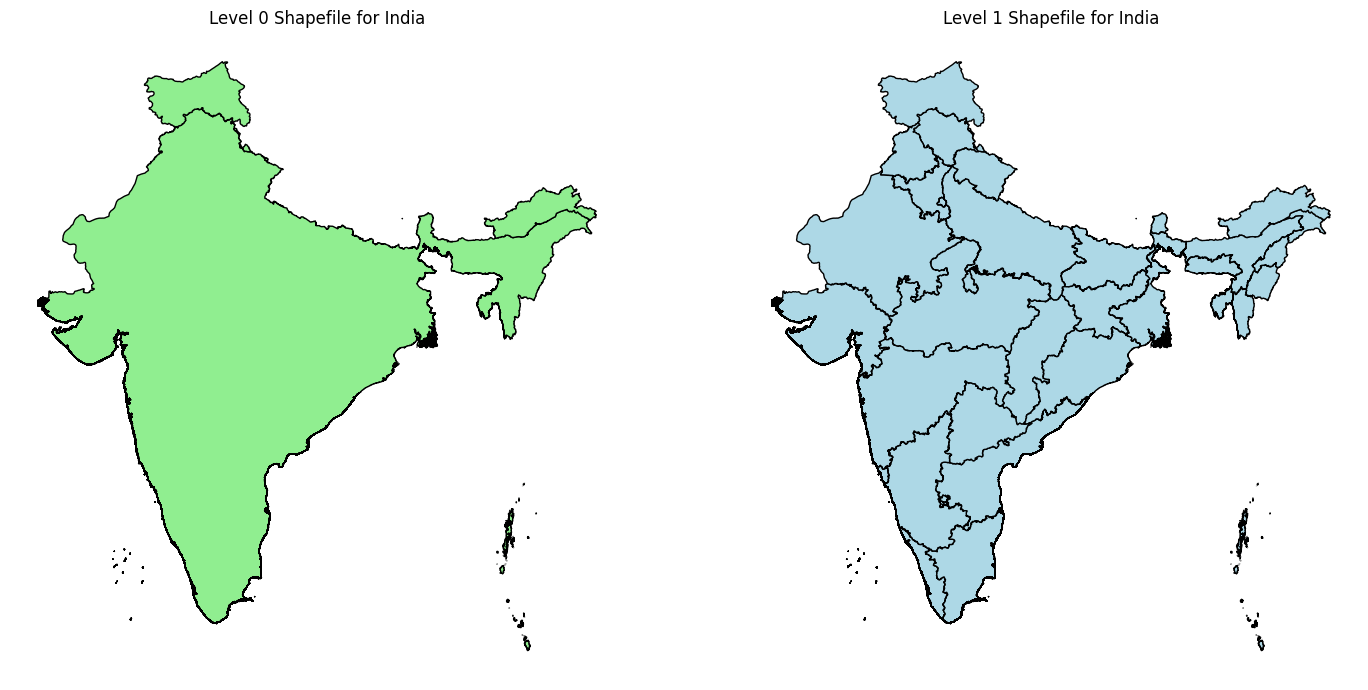

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Load Level 0 shapefile for India
gadm0_gdf = gpd.read_file('data/gadm41/india/gadm41_IND_0.shp')
# Load Level 1 shapefile for India
gadm1_gdf = gpd.read_file('data/gadm41/india/gadm41_IND_1.shp')
# Display basic information about the loaded GeoDataFrames
print("\nLevel 0 GeoDataFrame:")
print(gadm0_gdf.info())
print("\nLevel 1 GeoDataFrame:")
print(gadm1_gdf.info())
# Plot the GeoDataFrames
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
# Plot Level 0 shapefile first
gadm0_gdf.plot(ax=ax[0], color='lightgreen', edgecolor='black')
ax[0].set_title('Level 0 Shapefile for India')
ax[0].set_axis_off()  # Turn off the axis
# Plot Level 1 shapefile second
gadm1_gdf.plot(ax=ax[1], color='lightblue', edgecolor='black')
ax[1].set_title('Level 1 Shapefile for India')
ax[1].set_axis_off()  # Turn off the axis
# Show the plots
plt.tight_layout()
plt.show()

### <span style="color: coral;">2.2 Combine Level 0 and Level 1 Shapefiles with Country Regional Code Dataset</span>

In [9]:
import os
import glob
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.table import Table
from matplotlib import rcParams
# Set global font properties for better aesthetics
rcParams['font.size'] = 14
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
# Define the directory containing the shapefiles
shapefile_dir = 'E:\\SentinelNO2-Detection\\data\\gadm41\\india'
# Detect shapefiles in the specified directory
shapefiles = glob.glob(os.path.join(shapefile_dir, '*.shp'))
# Select Level 0 and Level 1 shapefiles based on naming convention
level_0_shapefile = next((f for f in shapefiles if 'gadm41_IND_0' in f), None)
level_1_shapefile = next((f for f in shapefiles if 'gadm41_IND_1' in f), None)
# Check if both shapefiles are found
if level_0_shapefile is None or level_1_shapefile is None:
    raise ValueError("Both Level 0 and Level 1 shapefiles must be present in the directory.")
# Load Level 0 and Level 1 GeoDataFrames
india0_gdf = gpd.read_file(level_0_shapefile)  # Level 0 - India boundary
india1_gdf = gpd.read_file(level_1_shapefile)  # Level 1 - Indian states and Union Territories
# Reproject to a UTM CRS to avoid centroid calculation issues
india1_gdf = india1_gdf.to_crs(epsg=32643)  # UTM Zone 43N for India (adjust if necessary)
india0_gdf = india0_gdf.to_crs(india1_gdf.crs)  # Ensure both layers use the same CRS
# Define column names for states/UTs and codes
state_code_column = 'NAME_1'  # Column for state/UT names in Level 1 shapefile
state_abbr_column = 'state_abbr'
# Ensure the state name column exists in the GeoDataFrame
if state_code_column not in india1_gdf.columns:
    raise ValueError(f"'{state_code_column}' not found in india1_gdf columns.")
# Custom list of all states and union territories with unique abbreviations
states_uts = {
    "Andaman and Nicobar": "AAN",
    "Andhra Pradesh": "AP",
    "Arunachal Pradesh": "AR",
    "Assam": "AS",
    "Bihar": "BI",
    "Chandigarh": "CH",
    "Chhattisgarh": "CG",
    "Dadra and Nagar Haveli": "DNH",
    "Daman and Diu": "DAD",
    "Goa": "GA",
    "Gujarat": "GJ",
    "Haryana": "HR",
    "Himachal Pradesh": "HP",
    "Jammu and Kashmir": "JK",
    "Jharkhand": "JH",
    "Karnataka": "KA",
    "Kerala": "KL",
    "Lakshadweep": "LD",
    "Madhya Pradesh": "MP",
    "Maharashtra": "MH",
    "Manipur": "MN",
    "Meghalaya": "ML",
    "Mizoram": "MZ",
    "Nagaland": "NL",
    "NCT of Delhi": "DL",
    "Odisha": "OD",
    "Puducherry": "PY",
    "Punjab": "PB",
    "Rajasthan": "RJ",
    "Sikkim": "SK",
    "Tamil Nadu": "TN",
    "Telangana": "TS",
    "Tripura": "TR",
    "Uttar Pradesh": "UP",
    "Uttarakhand": "UK",
    "West Bengal": "WB"
}
# Create a new column for state abbreviations
india1_gdf[state_abbr_column] = india1_gdf[state_code_column].map(states_uts)
# Check for missing state abbreviations
missing_abbr = india1_gdf[india1_gdf[state_abbr_column].isnull()]
if not missing_abbr.empty:
    print("Warning: The following states do not have assigned abbreviations:")
    print(missing_abbr[state_code_column])
# --- Create a Figure for Side-by-Side Maps ---
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 10))  # Create side-by-side subplots
# --- Plot Level 0: India Boundary (No state borders) ---
india0_gdf.plot(ax=ax0, color='lightgreen', edgecolor='black', linewidth=0.5)
ax0.set_title('Level 0: India Boundary', fontsize=20, fontweight='bold')
ax0.axis('off')
# --- Plot Level 1: Indian States/UTs with Unique Abbreviations ---
india1_gdf.plot(ax=ax1, color='lightblue', edgecolor='black', linewidth=0.5)
# Get the limits of the axes
xlim = ax1.get_xlim()
ylim = ax1.get_ylim()
# Place state abbreviations with arrows for smaller states
for _, row in india1_gdf.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    state_abbr = row[state_abbr_column]
    # Check if the centroid is within the axes limits
    if not (xlim[0] <= x <= xlim[1] and ylim[0] <= y <= ylim[1]):
        # Adjust arrow end position based on centroid coordinates if not within the axes
        arrow_x = x + 0.03  # Adjust as necessary for better placement
        arrow_y = y + 0.03  # Adjust as necessary for better placement
        ax1.annotate(f'{state_abbr} ----->', xy=(x, y), xytext=(arrow_x, arrow_y),
                     arrowprops=dict(arrowstyle='->', color='red', lw=1.5), fontsize=12, ha='center', color='darkblue', fontweight='bold')
    else:
        ax1.text(x, y, state_abbr, fontsize=12, ha='center', color='darkblue', fontweight='bold')
ax1.set_title('Level 1: Indian States/UTs with Unique Abbreviations', fontsize=20, fontweight='bold')
ax1.axis('off')
plt.tight_layout()
plt.show()
# --- Create CSV with State/UT Details ---
output_csv = india1_gdf[[state_code_column]].copy()
output_csv['state_abbreviation'] = india1_gdf[state_abbr_column]  # Add abbreviations to CSV
output_csv['area'] = india1_gdf.geometry.area  # Add area for each state
# Save the output to CSV
output_csv.to_csv('E:\\SentinelNO2-Detection\\data\\India\\india_state_details.csv', index=False)
print("State/UT details saved to 'india_state_details.csv'")
# --- Display a Numbered Two-Column Table of State Abbreviations ---
state_abbr_dict = dict(zip(india1_gdf[state_abbr_column], india1_gdf[state_code_column]))
table_data = list(state_abbr_dict.items())
# Create a figure for the table
plt.figure(figsize=(12, 6))  # Adjust size of the table for better visibility
plt.axis('off')
# Create table with colored cells
table = Table(plt.gca(), bbox=[0, 0, 1, 1])
# Define column headers
headers = ['#', 'Abbreviation', 'State/UT Name']
# Add headers
for j, header in enumerate(headers):
    table.add_cell(0, j, 0.33, 0.1, text=header, loc='center', facecolor='lightgrey', edgecolor='black')
    table[(0, j)].set_fontsize(14)  # Set font size for headers
# Add data rows with numbering
for i, (abbr, state) in enumerate(table_data):
    row_color = '#f9c2d8' if i % 2 == 0 else '#e6f7ff'  # Alternate row colors
    table.add_cell(i + 1, 0, 0.33, 0.1, text=str(i + 1), loc='center', facecolor=row_color, edgecolor='black')
    table.add_cell(i + 1, 1, 0.33, 0.1, text=abbr, loc='center', facecolor=row_color, edgecolor='black')
    table.add_cell(i + 1, 2, 0.33, 0.1, text=state, loc='center', facecolor=row_color, edgecolor='black')
    # Set font size for data cells
    table[(i + 1, 0)].set_fontsize(12)
    table[(i + 1, 1)].set_fontsize(12)
    table[(i + 1, 2)].set_fontsize(12)
# Add the table to the axes
plt.gca().add_table(table)
plt.title('State Abbreviations Table', fontsize=20, fontweight='bold')
plt.show()


ValueError: Both Level 0 and Level 1 shapefiles must be present in the directory.

2.3 🗺️ <span style="color:#3498db;">Interactive India States Map with Shapefiles Download</span> - <strong><span style="color:#e74c3c;">Indian States with Provinces</span></strong> <span style="color:#f39c12;">(Flask App Integration)</span>

In [ ]:
import os
import requests
import zipfile
# Define the URL for the GADM shapefile and the target directory
url = "https://github.com/HindustanTimesLabs/shapefiles/raw/refs/heads/master/india/state_ut/india_state.zip"
target_dir = "data/gadm41/india/states"
zip_file_path = os.path.join(target_dir, "india_states.zip")
# Create the target directory if it does not exist
os.makedirs(target_dir, exist_ok=True)
# Check if the ZIP file already exists; if not, download it
if not os.path.isfile(zip_file_path):
    print("Downloading states shapefiles...")
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad responses
        # Save the downloaded content to a zip file
        with open(zip_file_path, 'wb') as f:
            f.write(response.content)
        print(f"Download completed: {zip_file_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error during download: {e}")
else:
    print(f"States shapefile already exists: {zip_file_path}. Skipping download.")
# Unzip the file if it exists
if os.path.isfile(zip_file_path):
    print(f"Unzipping the file: {zip_file_path}...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(target_dir)
        # List the files being extracted
        extracted_files = zip_ref.namelist()
    print(f"Unzip completed. Extracted files: {', '.join(extracted_files)}")
# List the contents of the target directory
print("Contents of the directory:")
print(os.listdir(target_dir))

States shapefile already exists: data/gadm41/india/states\india_states.zip. Skipping download.
Unzipping the file: data/gadm41/india/states\india_states.zip...
Unzip completed. Extracted files: India-States.prj, India-States.dbf, India-States.shx, India-States.shp
Contents of the directory:
['India-States.dbf', 'India-States.prj', 'India-States.shp', 'India-States.shx', 'india_states.zip']


In [ ]:
import geopandas as gpd

# Load States shapefile for India
gadm1_gdf = gpd.read_file('data/gadm41/india/states/India-States.shp')

# Print columns to identify the correct one
print(gadm1_gdf.columns)


Index(['ST_NM', 'geometry'], dtype='object')


In [ ]:
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
from flask import Flask, send_from_directory, render_template_string, request
import threading
import webbrowser
import os
import time
from IPython.display import display, Javascript
# Initialize Flask app
app = Flask(__name__)
@app.route('/')
def serve_map():
    return render_template_string('''
        <!DOCTYPE html>
        <html>
        <head>
            <title>India States Interactive Map</title>
            <style>
                body {
                    font-family: Arial, sans-serif;
                    background: linear-gradient(to right, #f0f8ff, #e6e6fa);
                    color: #333;
                    text-align: center;
                    margin: 0;
                    padding: 0;
                    animation: fadeIn 1s;
                }
                @keyframes fadeIn {
                    from { opacity: 0; }
                    to { opacity: 1; }
                }
                h1 {
                    color: #4682b4;
                    margin-top: 20px;
                    transition: color 0.5s;
                }
                h1:hover {
                    color: #5a9bd4;
                }
                a, button {
                    display: inline-block;
                    padding: 10px 20px;
                    margin: 20px;
                    background-color: #4682b4;
                    color: white;
                    text-decoration: none;
                    border-radius: 5px;
                    transition: background-color 0.3s, transform 0.3s;
                }
                a:hover, button:hover {
                    background-color: #5a9bd4;
                    transform: scale(1.05);
                }
                .container {
                    display: flex;
                    flex-direction: column;
                    justify-content: center;
                    align-items: center;
                    height: 100vh;
                }
                footer {
                    margin-top: 50px;
                    font-size: 0.8em;
                    color: #666;
                }
            </style>
        </head>
        <body>
            <div class="container">
                <h1>India States Interactive Map</h1>
                <a href="/map" target="_blank">View Interactive Map</a>
                <button onclick="stopServer()">Stop Server</button>
            </div>
            <footer>
                <p>&copy; 2024 SentinelNO2-Detection. All rights reserved.</p>
            </footer>
            <script>
                function stopServer() {
                    fetch('/stop', { method: 'POST' }).then(response => response.text()).then(data => {
                        alert(data);
                        window.close();
                    });
                }
            </script>
        </body>
        </html>
    ''')
@app.route('/map')
def serve_html():
    return send_from_directory('.', 'india_states_map.html')
@app.route('/stop', methods=['POST'])
def stop():
    shutdown = request.environ.get('werkzeug.server.shutdown')
    if shutdown:
        shutdown()
    return 'Server shutting down...'
def open_browser():
    webbrowser.open_new('http://127.0.0.1:5000/')
# Load States shapefile for India using all necessary files
gadm1_gdf = gpd.read_file('data/gadm41/india/states/India-States.shp')
gadm1_gdf = gadm1_gdf.to_crs(epsg=4326)
gadm1_geojson = gadm1_gdf.__geo_interface__
def highlight_state(fig, state_name):
    state = gadm1_gdf[gadm1_gdf['ST_NM'] == state_name]
    fig.add_trace(go.Scattermapbox(
        lat=state.geometry.centroid.y,
        lon=state.geometry.centroid.x,
        mode='markers+text',
        marker=go.scattermapbox.Marker(size=14, color='orange'),
        text=[state_name],
        textposition="top center"
    ))
    fig.update_layout(mapbox=dict(
        zoom=5,
        center={"lat": state.geometry.centroid.y.values[0], "lon": state.geometry.centroid.x.values[0]},
        style="open-street-map"
    ))
fig = px.choropleth_mapbox(gadm1_gdf, geojson=gadm1_geojson, locations=gadm1_gdf.index,
                           color='ST_NM', hover_name='ST_NM', mapbox_style="open-street-map",
                           zoom=3, center={"lat": 22.9734, "lon": 78.6569}, opacity=0.5)
highlight_state(fig, 'Uttarakhand')
html_file = "india_states_map.html"
fig.write_html(html_file)
def run_app_with_timer(timeout=120):
    def run_app():
        app.run(port=5000)
    server_thread = threading.Thread(target=run_app)
    server_thread.start()
    time.sleep(timeout)
    display(Javascript('IPython.notebook.execute_cells_below()'))
    server_thread.join()
threading.Timer(1, open_browser).start()
run_app_with_timer()


C:\Users\Hp\AppData\Local\Temp\ipykernel_30108\187349880.py:107: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Hp\AppData\Local\Temp\ipykernel_30108\187349880.py:108: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Hp\AppData\Local\Temp\ipykernel_30108\187349880.py:116: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [31/Oct/2024 14:08:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Oct/2024 14:08:06] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2024 14:08:09] "GET /map HTTP/1.1" 200 -


3. 🥒 <span style="color:#3498db;">Pickle Geospatial DataFrames (GDFs)</span> - <strong><span style="color:#e74c3c;">Efficient Data Handling</span></strong>


In [ ]:
import geopandas as gpd
import os
# Define the file paths and categories
files = {
    'India1_gdf': {'path': 'data/gadm41/india/gadm41_IND_1.shp', 'category': 'India'},
    'India0_gdf': {'path': 'data/gadm41/india/gadm41_IND_0.shp', 'category': 'India'},
    'India_States': {'path': 'data/gadm41/india/states/India-States.shp', 'category': 'States'}
}
# Base directory for pickled files
pickle_base_dir = 'data/pickle_files'
# Function to create directory if it doesn't exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Created directory: {directory}")
# Function to check if file exists and convert to pickle
def convert_to_pickle(file_key, file_info):
    file_path = file_info['path']
    category = file_info['category']
    pickle_dir = os.path.join(pickle_base_dir, f'{category}_pickle')
    create_directory(pickle_dir)
    if os.path.isfile(file_path):
        try:
            gdf = gpd.read_file(file_path)
            pickle_path = os.path.join(pickle_dir, f'{file_key}.pickle')
            gdf.to_pickle(pickle_path)
            print(f"{file_key} converted to {pickle_path}")
        except Exception as e:
            print(f"Error converting {file_key}: {e}")
    else:
        print(f"File not found: {file_path}")
# Convert the files to pickle
for key, info in files.items():
    convert_to_pickle(key, info)


Created directory: data/pickle_files\India_pickle
India1_gdf converted to data/pickle_files\India_pickle\India1_gdf.pickle
India0_gdf converted to data/pickle_files\India_pickle\India0_gdf.pickle
Created directory: data/pickle_files\States_pickle
India_States converted to data/pickle_files\States_pickle\India_States.pickle
